In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
import os

import rain

In [19]:
rain.setCUDAVisible("-1")

DATA_CACHE = "data/df-cache.csv"
FREQUENCY = 30
TIMESTEP_LEN = 200
PREDICT_LEN = 200

In [15]:
#model
model = keras.models.Sequential()
#timesteps of history - with a vector of size 1 per timestep
model.add(keras.layers.GRU(32, input_shape = (TIMESTEP_LEN, 1), return_sequences = True))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("tanh"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.GRU(32))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("tanh"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation("linear"))
model.compile(loss = "mean_squared_logarithmic_error", 
    optimizer = keras.optimizers.adam(lr = 0.0003))

In [ ]:
model.load_weights(rain.toRelPath("weights/0_2_54.3567.h5"))

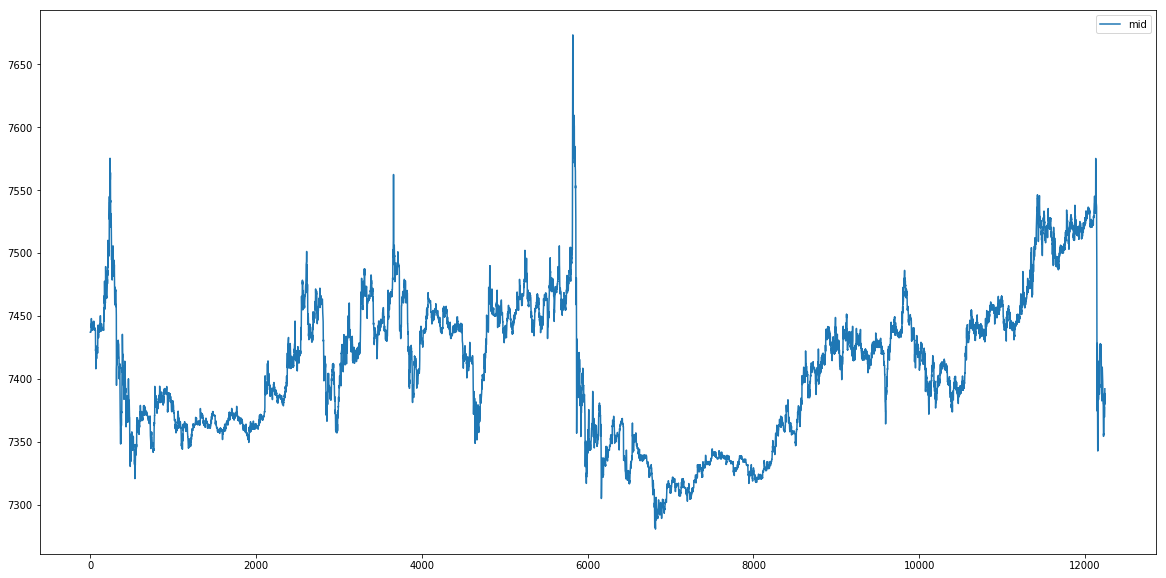

In [17]:
#data
df = pd.read_csv(rain.toRelPath(DATA_CACHE))
df = df.iloc[::int(2 * FREQUENCY), :]
df.reset_index(inplace = True)
mid = df["mid"]
mid.fillna(method = "bfill", inplace = True)

plt.figure(figsize = (20, 10))
plt.plot(mid)
plt.legend()
plt.show()

In [18]:
#predict from random place in the sequence
start = np.random.randint(0, len(mid) // 2)
pattern = mid[start:start + TIMESTEP_LEN].values.tolist()
predictions = pattern
for a in range(PREDICT_LEN):
    print(a, end = "\r")
    predictions.append(model.predict(
        np.reshape(pattern, (1, TIMESTEP_LEN, 1)), 
        verbose = 0)[0][0])
    pattern = predictions[-TIMESTEP_LEN:]

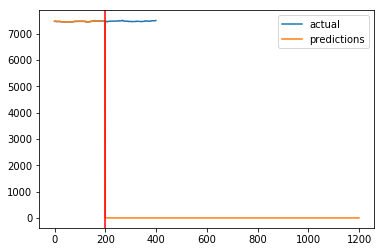

In [20]:
plt.plot(mid[start:start + TIMESTEP_LEN + PREDICT_LEN].values, label = "actual")
plt.plot(predictions, label = "predictions")
plt.axvline(x = TIMESTEP_LEN, c = "r")
plt.legend()
plt.show()